# Analiza kodu importowania bibliotek do projektu przewidywania chorób serca

## 1. Podstawowe biblioteki do analizy danych

```python
import pandas as pd
import numpy as np
```

- **pandas (pd)**: Fundamentalna biblioteka do analizy danych w Pythonie
  - Umożliwia wczytywanie danych z plików CSV
  - Zapewnia struktury danych DataFrame i Series
  - Oferuje zaawansowane narzędzia do manipulacji i analizy danych
  - W naszym projekcie używana do wczytania i przetwarzania danych o pacjentach

- **numpy (np)**: Biblioteka do obliczeń numerycznych
  - Zapewnia wydajne operacje na tablicach wielowymiarowych
  - Dostarcza funkcje matematyczne i statystyczne
  - W projekcie używana do przekształceń numerycznych i operacji macierzowych

## 2. Biblioteki do wizualizacji

```python
import matplotlib.pyplot as plt
import seaborn as sns
```

- **matplotlib.pyplot (plt)**:
  - Podstawowa biblioteka do tworzenia wykresów
  - Używana do wizualizacji wyników modelu
  - W projekcie służy do tworzenia wykresów uczenia i macierzy pomyłek

- **seaborn (sns)**:
  - Rozszerzenie matplotlib o zaawansowane wizualizacje statystyczne
  - Oferuje estetyczne style wykresów
  - W projekcie używana do tworzenia atrakcyjnych heatmap i wykresów statystycznych

## 3. Framework uczenia maszynowego

```python
import tensorflow as tf
```
- **tensorflow (tf)**:
  - Zaawansowany framework do uczenia maszynowego
  - Umożliwia budowę i trening sieci neuronowych
  - W projekcie używany jako backend dla Kerasa

## 4. Narzędzia do przetwarzania danych

```python
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
```

- **train_test_split**:
  - Funkcja do podziału danych na zbiór treningowy i testowy
  - Zapewnia losowy podział z zachowaniem proporcji klas

- **StandardScaler**:
  - Klasa do standaryzacji danych
  - Przekształca cechy do standardowego rozkładu normalnego
  - Kluczowa dla poprawnego działania sieci neuronowej

## 5. Metryki oceny modelu

```python
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
```

- Zestaw metryk do oceny jakości modelu:
  - **accuracy_score**: ogólna dokładność modelu
  - **confusion_matrix**: macierz pomyłek
  - **recall_score**: czułość (jak dobrze model wykrywa przypadki pozytywne)
  - **precision_score**: precyzja (jak dokładne są przewidywania pozytywne)
  - **f1_score**: średnia harmoniczna precyzji i czułości

## 6. Komponenty sieci neuronowej

```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
```

- **Sequential**:
  - Model sekwencyjny Kerasa
  - Umożliwia budowę sieci neuronowej warstwa po warstwie

- **Dense**:
  - Warstwa w pełni połączona
  - Podstawowy typ warstwy w sieci neuronowej
  - W projekcie używana do budowy klasyfikatora chorób serca


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Wczytywanie i przygotowanie danych o chorobach serca

## 1. Wczytanie danych z pliku CSV
```python
data = pd.read_csv('heart.csv')
```
Ten wiersz kodu:
- Używa funkcji `read_csv()` z biblioteki pandas
- Wczytuje dane z pliku 'heart.csv' do DataFrame
- Automatycznie interpretuje strukturę danych w pliku CSV

## 2. Zmiana nazw kolumn na język polski
```python
data.columns = [
    'wiek', 'płeć', 'ból_w_klatce', 'ciśnienie_krwi', 'cholesterol',
    'cukier_we_krwi', 'wynik_EKG', 'tętno', 'ból_wysiłkowy',
    'depresja_ST', 'nachylenie_ST', 'naczynia', 'thal', 'choroba_serca'
]
```
Ten fragment:
- Przypisuje nowe nazwy kolumn w języku polskim
- Ułatwia interpretację danych poprzez opisowe nazwy
- Zawiera następujące informacje o pacjencie:
  - `wiek`: wiek pacjenta
  - `płeć`: płeć pacjenta (1 = mężczyzna, 0 = kobieta)
  - `ból_w_klatce`: typ bólu w klatce piersiowej (0-3)
  - `ciśnienie_krwi`: spoczynkowe ciśnienie krwi w mm Hg
  - `cholesterol`: poziom cholesterolu w mg/dl
  - `cukier_we_krwi`: poziom cukru na czczo > 120 mg/dl (1 = tak, 0 = nie)
  - `wynik_EKG`: wyniki elektrokardiogramu spoczynkowego (0-2)
  - `tętno`: maksymalne osiągnięte tętno
  - `ból_wysiłkowy`: ból dławicowy wywołany wysiłkiem (1 = tak, 0 = nie)
  - `depresja_ST`: depresja odcinka ST wywołana wysiłkiem
  - `nachylenie_ST`: nachylenie szczytowego odcinka ST
  - `naczynia`: liczba głównych naczyń (0-3)
  - `thal`: wynik badania perfuzji mięśnia sercowego (1,2,3)
  - `choroba_serca`: zmienna docelowa (1 = choroba obecna, 0 = brak choroby)

## 3. Podgląd danych
```python
data.head(15)
```
Ta komenda:
- Wyświetla pierwsze 15 wierszy DataFrame
- Pozwala na wstępną inspekcję danych
- Umożliwia weryfikację poprawności wczytania danych i zmiany nazw kolumn

In [5]:
data = pd.read_csv('heart.csv')

data.columns = [
    'wiek', 'płeć', 'ból_w_klatce', 'ciśnienie_krwi', 'cholesterol',
    'cukier_we_krwi', 'wynik_EKG', 'tętno', 'ból_wysiłkowy',
    'depresja_ST', 'nachylenie_ST', 'naczynia', 'thal', 'choroba_serca'
]

data.head(15)

,wiek,płeć,ból_w_klatce,ciśnienie_krwi,cholesterol,cukier_we_krwi,wynik_EKG,tętno,ból_wysiłkowy,depresja_ST,nachylenie_ST,naczynia,thal,choroba_serca
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


# Wizualizacja danych o chorobach serca

## 1. Wykres liczebności przypadków chorób serca
```python
sns.countplot(x='target', data=data)
plt.title('Rozkład zmiennej docelowej')
plt.xlabel('Choroba serca')
plt.ylabel('Liczba przypadków')
plt.show()
```

Ten fragment kodu tworzy wykres słupkowy pokazujący:
- Rozkład zmiennej docelowej (choroba serca)
- Oś X: 0 = brak choroby, 1 = obecność choroby
- Oś Y: liczba pacjentów w każdej kategorii
- Wykorzystuje funkcję `countplot` z biblioteki Seaborn do wizualizacji rozkładu
- Pozwala ocenić zbilansowanie klas w zbiorze danych

## 2. Macierz korelacji
```python
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title('Macierz korelacji')
plt.show()
```

Ten kod generuje mapę cieplną korelacji, która:
- Tworzy nowy wykres o wymiarach 12x8 cali dla lepszej czytelności
- Oblicza macierz korelacji Pearsona między wszystkimi zmiennymi
- Wizualizuje korelacje za pomocą mapy cieplnej:
  - Jaśniejsze kolory = silniejsza korelacja dodatnia
  - Ciemniejsze kolory = silniejsza korelacja ujemna
  - Wartości liczbowe pokazują dokładne współczynniki korelacji
  - Format '.2f' wyświetla wartości z dwoma miejscami po przecinku
- Używa palety kolorów 'Blues'
- Pomaga zidentyfikować:
  - Które zmienne są silnie skorelowane ze zmienną docelową
  - Potencjalne problemy z multikolinearnością
  - Najważniejsze cechy dla modelu predykcyjnego

Ta wizualizacja jest kluczowa dla:
- Zrozumienia relacji między zmiennymi
- Wyboru istotnych cech do modelu
- Identyfikacji redundantnych zmiennych

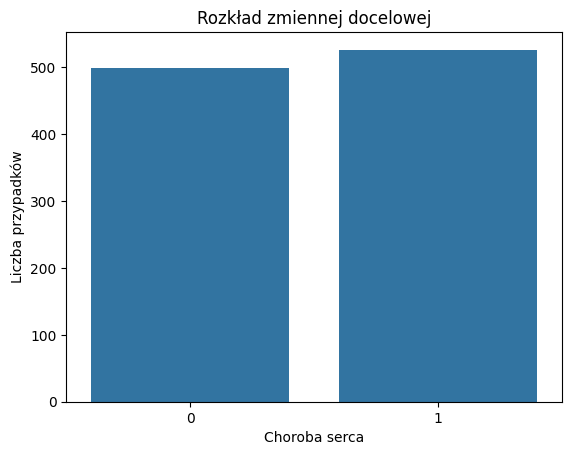

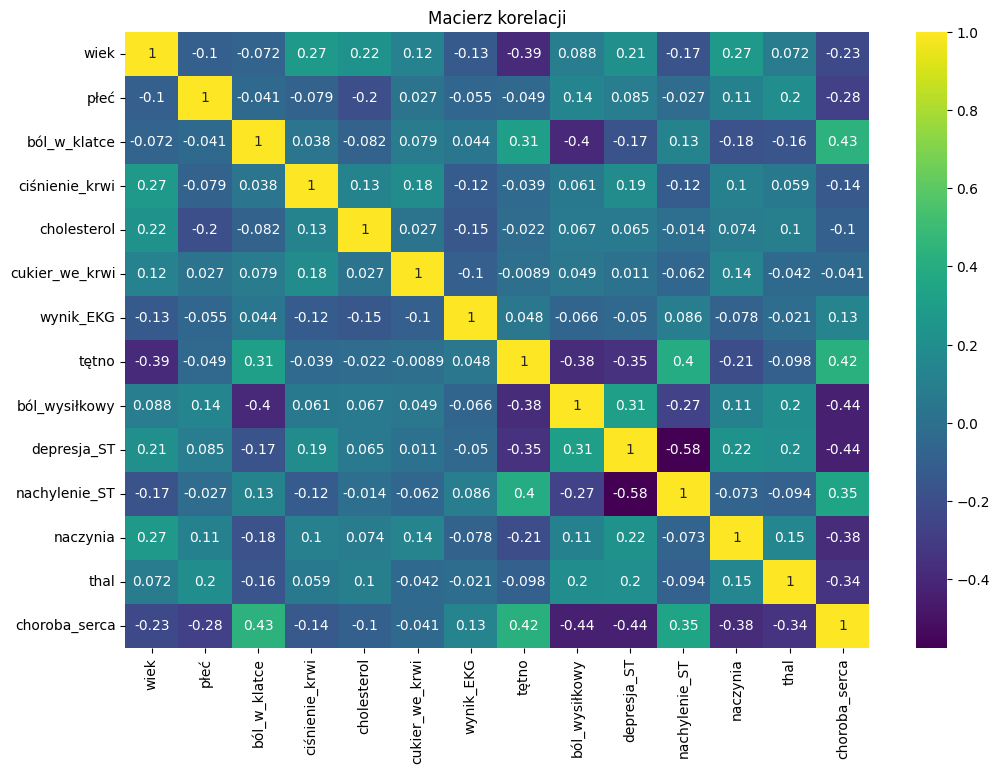

In [6]:
sns.countplot(x='choroba_serca', data=data)
plt.title('Rozkład zmiennej docelowej')
plt.xlabel('Choroba serca')
plt.ylabel('Liczba przypadków')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='viridis')
plt.title('Macierz korelacji')
plt.show()

# Przygotowanie danych do modelowania

## 1. Podział na cechy i zmienną docelową
```python
X = data.drop('choroba_serca', axis=1)
y = data['choroba_serca']
```
Ten fragment kodu:
- Tworzy macierz cech `X` poprzez usunięcie kolumny 'choroba_serca':
  - `data.drop()` usuwa wskazaną kolumnę
  - `axis=1` oznacza usunięcie kolumny (nie wiersza)
  - `X` zawiera wszystkie cechy opisujące pacjenta
- Tworzy wektor zmiennej docelowej `y`:
  - Zawiera informację o obecności choroby serca (0 lub 1)
  - Będzie używany jako zmienna do przewidywania

## 2. Standaryzacja danych
```python
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```
Ten kod:
- Tworzy obiekt `StandardScaler`:
  - Służy do standaryzacji danych
  - Przekształca cechy tak, aby miały średnią 0 i odchylenie standardowe 1
- Wykonuje standaryzację danych:
  - `fit_transform()` oblicza parametry standaryzacji i transformuje dane
  - Standaryzacja jest kluczowa dla poprawnego działania modelu
  - Zapewnia, że wszystkie cechy mają podobną skalę

## 3. Podział na zbiory treningowe i testowe
```python
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
```
Ten fragment:
- Dzieli dane na zbiór treningowy i testowy:
  - `X_scaled` - standaryzowane cechy
  - `y` - zmienna docelowa
  - `test_size=0.2` - 20% danych idzie do zbioru testowego
  - `random_state=42` - zapewnia powtarzalność podziału
- Tworzy cztery zbiory danych:
  - `X_train`: cechy do treningu modelu (80% danych)
  - `X_test`: cechy do testowania modelu (20% danych)
  - `y_train`: etykiety do treningu
  - `y_test`: etykiety do testowania
- Umożliwia:
  - Trenowanie modelu na jednym zbiorze danych
  - Testowanie jego skuteczności na niezależnym zbiorze
  - Uniknięcie przeuczenia modelu

In [7]:
X = data.drop('choroba_serca', axis=1)
y = data['choroba_serca']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Budowa i kompilacja modelu sieci neuronowej

## 1. Definicja architektury modelu
```python
model = Sequential([
    Dense(256, activation='relu', input_shape=(13,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
```
Ten fragment tworzy sekwencyjny model sieci neuronowej:
- Pierwsza warstwa:
  - 256 neuronów
  - Funkcja aktywacji ReLU (Rectified Linear Unit)
  - `input_shape=(13,)` - przyjmuje 13 cech wejściowych
- Kolejne warstwy ukryte:
  - Zmniejszająca się liczba neuronów (128 → 64 → 32)
  - Wszystkie używają funkcji aktywacji ReLU
  - Tworzą hierarchiczną reprezentację cech
- Warstwa wyjściowa:
  - 1 neuron (klasyfikacja binarna)
  - Funkcja aktywacji sigmoid (zwraca wartość między 0 a 1)

## 2. Kompilacja modelu
```python
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
```
Ten kod konfiguruje proces uczenia:
- Funkcja straty: `binary_crossentropy`
  - Odpowiednia dla klasyfikacji binarnej
  - Mierzy różnicę między przewidywaniami a rzeczywistymi wartościami
- Optymalizator: `adam`
  - Adaptacyjny algorytm optymalizacji
  - Automatycznie dostosowuje współczynnik uczenia
- Metryki: `accuracy`
  - Śledzi dokładność modelu podczas treningu
  - Pokazuje procent poprawnych przewidywań

## 3. Podsumowanie modelu
```python
model.summary()
```
Ta komenda:
- Wyświetla szczegółową strukturę modelu
- Pokazuje:
  - Liczbę parametrów w każdej warstwie
  - Kształt wyjścia każdej warstwy
  - Całkowitą liczbę parametrów do nauki
- Pomaga zweryfikować poprawność architektury
- Umożliwia ocenę złożoności modelu

In [8]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(13,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,849 (183.00 KB)

 Trainable params: 46,849 (183.00 KB)

 Non-trainable params: 0 (0.00 B)

# Trenowanie modelu sieci neuronowej

## 1. Proces trenowania
```python
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    validation_split=0.2,
                    batch_size=4096)
```

Ten kod inicjuje i przeprowadza proces trenowania modelu:

### Parametry treningu:
- `X_train, y_train`:
  - Dane treningowe i odpowiadające im etykiety
  - Używane do nauki modelu

- `epochs=100`:
  - Liczba pełnych przejść przez zbiór treningowy
  - Model przejdzie przez dane 100 razy
  - Każda epoka to jedna pełna iteracja uczenia

- `validation_split=0.2`:
  - 20% danych treningowych zostanie użyte jako zbiór walidacyjny
  - Służy do monitorowania jakości modelu podczas treningu
  - Pomaga wykryć przeuczenie (overfitting)

- `batch_size=4096`:
  - Liczba próbek przetwarzanych jednocześnie
  - Większy batch size przyspiesza trening
  - Może wpływać na zdolność generalizacji modelu

### Obiekt `history`:
- Przechowuje historię treningu:
  - Wartości funkcji straty
  - Dokładność na zbiorze treningowym
  - Dokładność na zbiorze walidacyjnym
- Umożliwia później:
  - Wizualizację procesu uczenia
  - Analizę jakości treningu
  - Wykrywanie problemów z uczeniem

Ten etap jest kluczowy dla:
- Nauczenia modelu rozpoznawania wzorców w danych
- Dostrojenia wag sieci neuronowej
- Osiągnięcia optymalnej skuteczności predykcji

In [9]:
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=4096,
                    validation_split=0.2)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3979 - loss: 0.7040 - val_accuracy: 0.7561 - val_loss: 0.6690
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.7759 - loss: 0.6632 - val_accuracy: 0.7744 - val_loss: 0.6409
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.8415 - loss: 0.6279 - val_accuracy: 0.7866 - val_loss: 0.6149
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.8369 - loss: 0.5953 - val_accuracy: 0.8232 - val_loss: 0.5893
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.8628 - loss: 0.5632 - val_accuracy: 0.8171 - val_loss: 0.5645
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.8613 - loss: 0.5313 - val_accuracy: 0.8171 - val_loss: 0.5400
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.8582 - loss: 0.4995 - val_accuracy: 0.8110 - val_loss: 0.5164
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.8643 - loss: 0.4686 - val_accuracy: 0.8171 - val_

# Wizualizacja procesu uczenia modelu

## 1. Tworzenie wykresu historii treningu
```python
plt.figure(figsize=(12, 8))  # Ustawienie rozmiaru wykresu
```

### Wykres dokładności
```python
plt.subplot(2, 1, 1)  # Pierwszy podwykres
plt.plot(history.history['accuracy'], label='Dokładność treningu')
plt.plot(history.history['val_accuracy'], label='Dokładność walidacji')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()
```
Ten fragment:
- Tworzy wykres dokładności modelu w czasie
- Pokazuje dwie krzywe:
  - Niebieska: dokładność na zbiorze treningowym
  - Pomarańczowa: dokładność na zbiorze walidacyjnym
- Pozwala ocenić:
  - Jak szybko model się uczy
  - Czy występuje przeuczenie
  - Stabilność procesu uczenia

### Wykres funkcji straty
```python
plt.subplot(2, 1, 2)  # Drugi podwykres
plt.plot(history.history['loss'], label='Strata treningu')
plt.plot(history.history['val_loss'], label='Strata walidacji')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.legend()
plt.show()
```
Ten fragment:
- Wizualizuje zmianę funkcji straty w czasie
- Przedstawia:
  - Stratę na zbiorze treningowym
  - Stratę na zbiorze walidacyjnym
- Umożliwia:
  - Monitorowanie zbieżności modelu
  - Wykrycie momentu przeuczenia
  - Ocenę jakości procesu uczenia

### Interpretacja wykresów:
- Zbliżone krzywe treningu i walidacji → dobra generalizacja
- Rozbieżne krzywe → przeuczenie
- Niestabilne krzywe → problemy z uczeniem
- Plateau → model osiągnął limit uczenia

Ten rodzaj wizualizacji jest kluczowy dla:
- Diagnostyki procesu uczenia
- Optymalizacji hiperparametrów
- Wyboru najlepszego momentu zatrzymania treningu

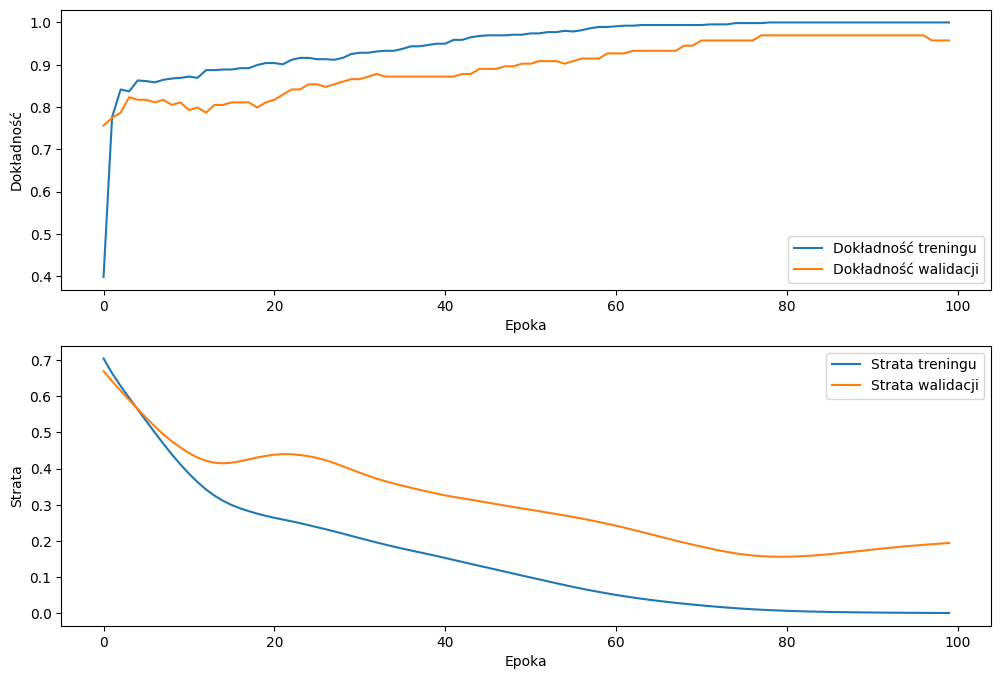

In [10]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Dokładność treningu')
plt.plot(history.history['val_accuracy'], label='Dokładność walidacji')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Strata treningu')
plt.plot(history.history['val_loss'], label='Strata walidacji')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.legend()
plt.show()

# Ewaluacja modelu na zbiorze testowym

## 1. Przewidywanie wyników na zbiorze testowym
```python
y_pred = (model.predict(X_test) > 0.5).astype("int32")
```
Ten fragment kodu:
- Używa wytrenowanego modelu do przewidywania wyników na zbiorze testowym `X_test`
- `model.predict(X_test)` zwraca prawdopodobieństwa przynależności do klasy 1
- `> 0.5` przekształca prawdopodobieństwa na klasy binarne (0 lub 1)
- `.astype("int32")` konwertuje wyniki na typ całkowity

## 2. Obliczanie metryk ewaluacyjnych
```python
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
```
Ten fragment kodu:
- Oblicza różne metryki oceny modelu:
  - **accuracy**: dokładność modelu
    - Procent poprawnych przewidywań
  - **recall**: czułość modelu
    - Procent poprawnie wykrytych przypadków pozytywnych
  - **precision**: precyzja modelu
    - Procent poprawnych przewidywań pozytywnych
  - **f1**: F1-score
    - Średnia harmoniczna precyzji i czułości

## 3. Wyświetlanie wyników
```python
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1: {f1}')
```
Ten fragment kodu:
- Wyświetla obliczone metryki w czytelnej formie
- Pozwala na ocenę jakości modelu na zbiorze testowym
- Pomaga zrozumieć, jak dobrze model radzi sobie z przewidywaniem chorób serca

### Interpretacja metryk:
- **Accuracy**: Ogólna skuteczność modelu
- **Recall**: Zdolność modelu do wykrywania wszystkich przypadków choroby
- **Precision**: Dokładność przewidywań pozytywnych
- **F1**: Zbalansowana miara precyzji i czułości

Te metryki są kluczowe dla:
- Oceny jakości modelu
- Porównania różnych modeli
- Identyfikacji obszarów do poprawy

In [11]:
y_pred = (model.predict(X_test) > 0.5).astype('int32')

accuracy_score(y_test, y_pred)
recall_score(y_test, y_pred)
precision_score(y_test, y_pred)
f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'Recall: {recall_score(y_test, y_pred):.4f}')
print(f'Precision: {precision_score(y_test, y_pred):.4f}')
print(f'F1: {f1_score(y_test, y_pred):.4f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Accuracy: 0.9561
Recall: 0.9320
Precision: 0.9796
F1: 0.9552


# Wizualizacja macierzy konfuzji

## 1. Tworzenie wykresu macierzy konfuzji
```python
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Macierz konfuzji')
plt.xlabel('Przewidywane wartości')
plt.ylabel('Rzeczywiste wartości')
plt.show()
```

### Opis kodu:

- **plt.figure(figsize=(8, 6))**:
  - Tworzy nową figurę o wymiarach 8x6 cali
  - Ustawia rozmiar wykresu dla lepszej czytelności

- **conf_matrix = confusion_matrix(y_test, y_pred)**:
  - Oblicza macierz konfuzji na podstawie rzeczywistych (`y_test`) i przewidywanych (`y_pred`) wartości
  - Macierz konfuzji pokazuje liczbę prawdziwych pozytywnych, prawdziwych negatywnych, fałszywych pozytywnych i fałszywych negatywnych przewidywań

- **sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)**:
  - Tworzy mapę cieplną macierzy konfuzji za pomocą Seaborn
  - **conf_matrix**: dane do wizualizacji
  - **annot=True**: wyświetla liczby w komórkach
  - **fmt='d'**: formatowanie liczb jako całkowite
  - **cmap='Blues'**: używa palety kolorów 'Blues'
  - **cbar=False**: wyłącza pasek kolorów

- **plt.title('Macierz konfuzji')**:
  - Ustawia tytuł wykresu

- **plt.xlabel('Przewidywane wartości')**:
  - Ustawia etykietę osi X jako 'Przewidywane wartości'

- **plt.ylabel('Rzeczywiste wartości')**:
  - Ustawia etykietę osi Y jako 'Rzeczywiste wartości'

- **plt.show()**:
  - Wyświetla wykres

### Interpretacja macierzy konfuzji:
- **True Positives (TP)**: Prawidłowo przewidziane przypadki choroby
- **True Negatives (TN)**: Prawidłowo przewidziane przypadki braku choroby
- **False Positives (FP)**: Błędnie przewidziane przypadki choroby (fałszywe alarmy)
- **False Negatives (FN)**: Błędnie przewidziane przypadki braku choroby (przeoczenia)

Macierz konfuzji jest kluczowa dla:
- Oceny dokładności modelu
- Identyfikacji typów błędów
- Poprawy modelu poprzez zrozumienie jego słabości

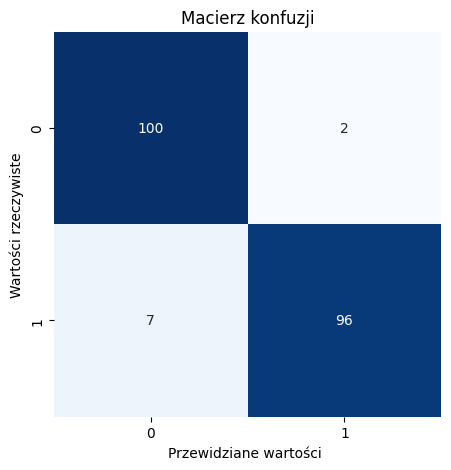

In [12]:
plt.figure(figsize=(5, 5))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Macierz konfuzji')
plt.xlabel('Przewidziane wartości ')
plt.ylabel('Wartości rzeczywiste')
plt.show()

# Przewidywanie ryzyka choroby serca na podstawie przykładowych danych

## 1. Przykładowe dane pacjentów
```python
data1 = {
    'wiek': 55,
    'płeć': 1,
    'ból_w_klatce': 0,
    'ciśnienie_krwi': 140,
    'cholesterol': 240,
    'cukier_we_krwi': 0,
    'wynik_EKG': 1,
    'tętno': 150,
    'ból_wysiłkowy': 0,
    'depresja_ST': 1.0,
    'nachylenie_ST': 2,
    'naczynia': 0,
    'thal': 2
}

data2 = pd.DataFrame([
    [34,0,1,118,210,0,1,192,0,0.7,2,0,2]
], columns=['wiek', 'płeć', 'ból_w_klatce', 'ciśnienie_krwi', 'cholesterol',
            'cukier_we_krwi', 'wynik_EKG', 'tętno', 'ból_wysiłkowy',
            'depresja_ST', 'nachylenie_ST', 'naczynia', 'thal'])
```
### Opis danych:
- **data1**: Dane pierwszego pacjenta w formie słownika
  - `wiek`: 55 lat
  - `płeć`: mężczyzna (1)
  - `ból_w_klatce`: brak bólu (0)
  - `ciśnienie_krwi`: 140 mm Hg
  - `cholesterol`: 240 mg/dl
  - `cukier_we_krwi`: poziom cukru na czczo ≤ 120 mg/dl (0)
  - `wynik_EKG`: nieprawidłowy wynik (1)
  - `tętno`: 150 bpm
  - `ból_wysiłkowy`: brak bólu (0)
  - `depresja_ST`: 1.0
  - `nachylenie_ST`: 2
  - `naczynia`: 0
  - `thal`: 2

- **data2**: Dane drugiego pacjenta w formie DataFrame
  - `wiek`: 34 lata
  - `płeć`: kobieta (0)
  - `ból_w_klatce`: ból typu 1
  - `ciśnienie_krwi`: 118 mm Hg
  - `cholesterol`: 210 mg/dl
  - `cukier_we_krwi`: poziom cukru na czczo ≤ 120 mg/dl (0)
  - `wynik_EKG`: nieprawidłowy wynik (1)
  - `tętno`: 192 bpm
  - `ból_wysiłkowy`: brak bólu (0)
  - `depresja_ST`: 0.7
  - `nachylenie_ST`: 2
  - `naczynia`: 0
  - `thal`: 2

## 2. Tworzenie DataFrame i skalowanie danych
```python
data1 = pd.DataFrame([data1])
data1_scaled = scaler.transform(data1)
data2_scaled = scaler.transform(data2)
```
### Opis kodu:
- **data1**: Konwersja słownika do DataFrame
- **scaler.transform()**: Skalowanie danych przy użyciu wcześniej dopasowanego `StandardScaler`
  - `data1_scaled`: Standaryzowane dane pierwszego pacjenta
  - `data2_scaled`: Standaryzowane dane drugiego pacjenta

## 3. Przewidywanie choroby serca dla obu przykładów
```python
prediction1 = model.predict(data1_scaled)
prediction2 = model.predict(data2_scaled)
```
### Opis kodu:
- **model.predict()**: Przewidywanie ryzyka choroby serca na podstawie standaryzowanych danych
  - `prediction1`: Wynik przewidywania dla pierwszego pacjenta
  - `prediction2`: Wynik przewidywania dla drugiego pacjenta

## 4. Wyświetlenie wyników
```python
print("\nWynik dla przykładu 1:")
print("Istnieje ryzyko choroby serca." if prediction1[0] == 1 else "Brak ryzyka choroby serca.")

print("\nWynik dla przykładu 2:")
print("Istnieje ryzyko choroby serca." if prediction2[0] == 1 else "Brak ryzyka choroby serca.")
```
### Opis kodu:
- **print()**: Wyświetla wyniki przewidywań
  - Dla każdego pacjenta sprawdza, czy istnieje ryzyko choroby serca
  - Wynik jest interpretowany na podstawie wartości przewidywanej (1 = ryzyko, 0 = brak ryzyka)

Ten kod umożliwia przewidywanie ryzyka choroby serca na podstawie przykładowych danych pacjentów, wykorzystując wytrenowany model sieci neuronowej.

In [13]:
data1 = {
    "wiek" : 52,
    "płeć" : 1,
    "ból_w_klatce" : 0,
    "ciśnienie_krwi" : 140,
    "cholesterol" : 240,
    "cukier_we_krwi" : 0,
    "wynik_EKG" : 1,
    "tętno" : 150,
    "ból_wysiłkowy" : 0,
    "depresja_ST" : 1.0,
    "nachylenie_ST" : 2,
    "naczynia" : 0,
    "thal" : 2
}

data2 = pd.DataFrame([[34, 0, 1, 118, 210, 0, 1, 192, 0, 0.7, 2, 0, 2]],
                     columns=['wiek', 'płeć', 'ból_w_klatce', 'ciśnienie_krwi', 'cholesterol',
                              'cukier_we_krwi', 'wynik_EKG', 'tętno', 'ból_wysiłkowy',
                              'depresja_ST', 'nachylenie_ST', 'naczynia', 'thal'])

data1 = pd.DataFrame([data1])
data1_scaled = scaler.transform(data1)

data2_scaled = scaler.transform(data2)

prediction1 = model.predict(data1_scaled)
prediction2 = model.predict(data2_scaled)

print("\n Wyniki dla osoby nr 1:")
print("Istnieje ryzyko choroby serca." if prediction1[0] == 1 else "Nie ma ryzyka choroby serca.")


print("\n Wyniki dla osoby nr 2:")
print("Istnieje ryzyko choroby serca." if prediction2[0] == 1 else "Nie ma ryzyka choroby serca.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

 Wyniki dla osoby nr 1:
Nie ma ryzyka choroby serca.

 Wyniki dla osoby nr 2:
Istnieje ryzyko choroby serca.
